In [255]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
os.chdir(r"C:\Users\laxmi\OneDrive\Desktop\Python projects\DataSets")
df = pd.read_csv("amazon.csv", encoding="ISO-8859-1",parse_dates=["date"])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [257]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [258]:
# 1. Display Top 5 Rows of The Dataset
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [259]:
# 2. Check Last 5 Rows
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [260]:
# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
df.shape

(6454, 5)

In [261]:
# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [262]:
# 5. Check For Duplicate Data and Drop Them
df.duplicated().sum()

32

In [263]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [264]:
# 6. Check Null Values In The Dataset
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [265]:
#7. Get Overall Statistics About The Dataframe
df.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [266]:
# 8. Rename Month Names To English
df["month"].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [267]:
df["month"]=df["month"].map({'Janeiro':'January','Fevereiro':'February','Março':'March',\
'Abril':'April','Maio':'May','Junho':'June','Julho':'July','Agosto':'August',\
'Setembro':'September','Outubro':'October','Novembro':'November','Dezembro':'December'})
df["month"].unique()

C:\Users\laxmi\AppData\Local\Temp\ipykernel_12384\581537011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"]=df["month"].map({'Janeiro':'January','Fevereiro':'February','Março':'March',\


array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [268]:
# 9. Total Number of Fires RegisterED
df.count()

year      6422
state     6422
month     6422
number    6422
date      6422
dtype: int64

In [269]:
# 10. In Which Month Maximum Number of Forest Fires Were Reported?
df.groupby("month")["number"].sum().head(1)

month
April    28184.77
Name: number, dtype: float64

In [270]:
# 11. In Which Year Maximum Number of Forest Fires Was Reported?
df.groupby("year")["number"].sum().head(1)

year
1998    20013.971
Name: number, dtype: float64

In [271]:
# 12. In Which State Maximum Number of Forest Fires Was Reported?
df.groupby("state")["number"].sum().head(1)

state
Acre    18464.03
Name: number, dtype: float64

In [272]:
# 13. Find Total Number of Fires Were Reported In Amazonas
df[df["state"]=="Amazonas"]["number"].sum()

30650.129

<Axes: xlabel='year', ylabel='number'>

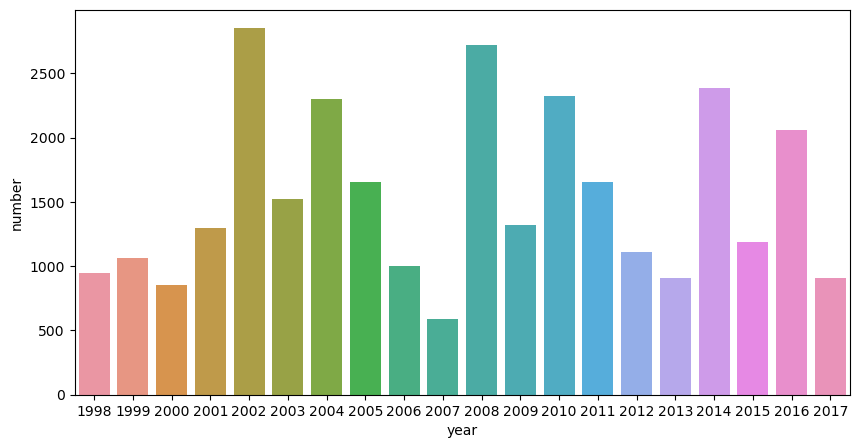

In [273]:
# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)
df4=df[df["state"]=="Amazonas"]
Yearly=df4.groupby("year")["number"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(y="number",x="year",data=Yearly)

    day_name    number
1     Monday  1886.601
5    Tuesday  6474.217
6  Wednesday  3910.177
4   Thursday  5754.802
0     Friday  5446.480
2   Saturday  4162.666
3     Sunday  3015.186


C:\Users\laxmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


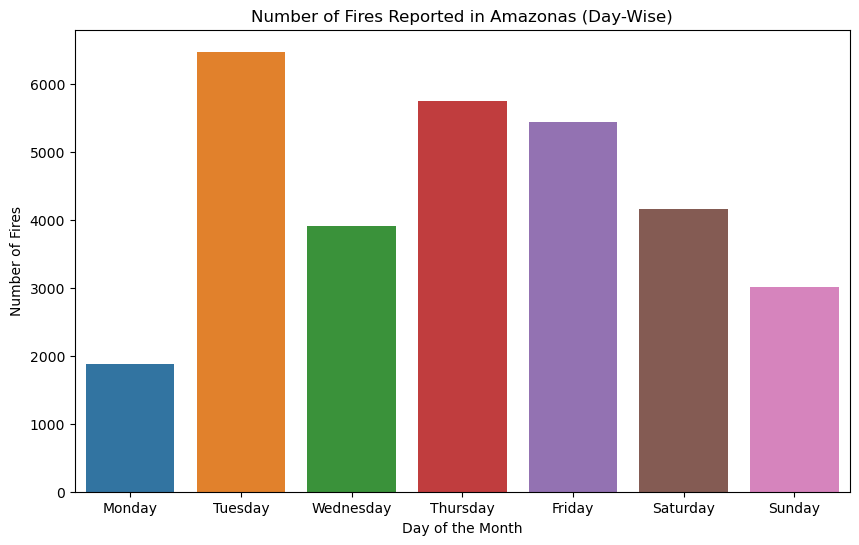

In [274]:
# 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)
# Filter data for Amazonas state
amazonas_fires = df[df["state"] == "Amazonas"].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Extract the weekday (0=Monday, 6=Sunday)
amazonas_fires["day"] = amazonas_fires["date"].dt.dayofweek

# Convert numbers (0-6) to day names
amazonas_fires["day_name"] = amazonas_fires["day"].apply(lambda x: calendar.day_name[x])

# Group by day name and sum the number of fires
daily_fires = amazonas_fires.groupby("day_name")["number"].sum().reset_index() 

# Order the days correctly
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_fires["day_name"] = pd.Categorical(daily_fires["day_name"], categories=ordered_days, ordered=True)
daily_fires = daily_fires.sort_values("day_name")

print(daily_fires)
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="day_name", y="number", data=daily_fires)
            
# Add labels and title
plt.xlabel("Day of the Month")
plt.ylabel("Number of Fires")
plt.title("Number of Fires Reported in Amazonas (Day-Wise)")
plt.show()

        month    number
4     January  4635.000
3    February  2309.000
7       March  2202.000
0       April  2573.000
8         May  2384.000
6        June  3260.552
5        July  4364.392
1      August  4363.125
11  September  2494.658
10    October  4499.525
9    November  4034.518
2    December  4088.522


C:\Users\laxmi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='month', ylabel='number'>

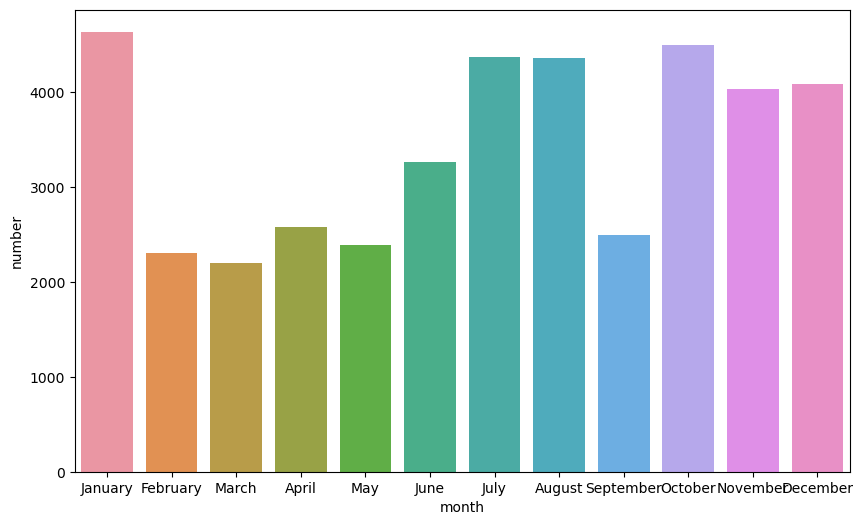

In [275]:
# 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
df2=df[df["year"]==2015].groupby("month")["number"].sum().reset_index()
# Order the days correctly
ordered_months=["January","February","March","April","May","June","July","August","September","October","November","December"]
df2["month"] = pd.Categorical(df2["month"], categories=ordered_months, ordered=True)
df2=df2.sort_values("month")

print(df2)
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="number", data=df2)

In [281]:
# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
df3=df.groupby("state")["number"].mean().sort_values(ascending=False).reset_index()
df3

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


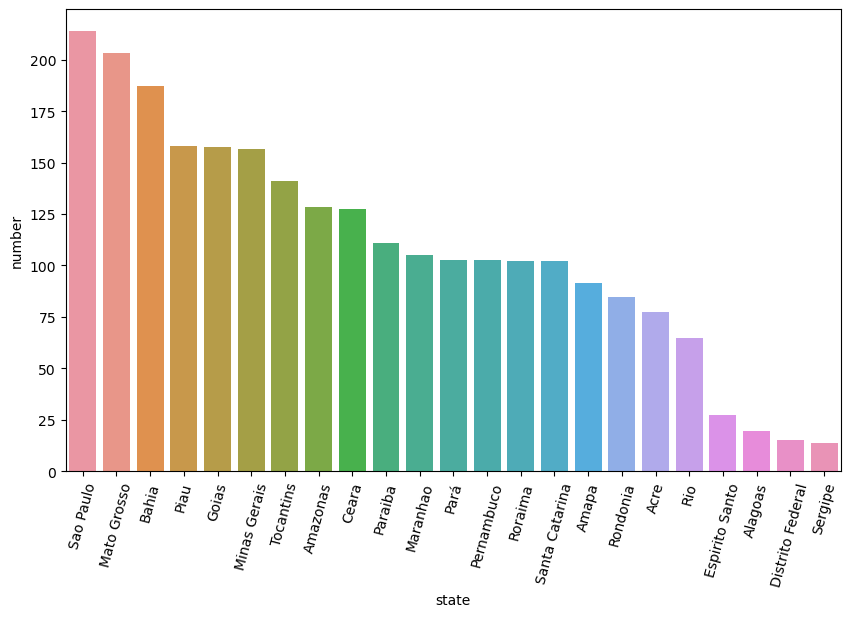

In [285]:
plt.figure(figsize=(10, 6))
sns.barplot(x="state", y="number", data=df3)
plt.xticks(rotation=75)
plt.show()

In [277]:
# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month
df[df["month"]=="December"]["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)